In [15]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Optional: Set plotting styles
sns.set(style="whitegrid")
%matplotlib inline

# 2. Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# 3. View the first few rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Column names
print("\nColumns:")
print(df.columns.tolist())

# Data types and missing values
print("\nInfo:")
print(df.info())

# Statistical summary
df.describe()


Dataset Shape: (10000, 14)

Columns:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


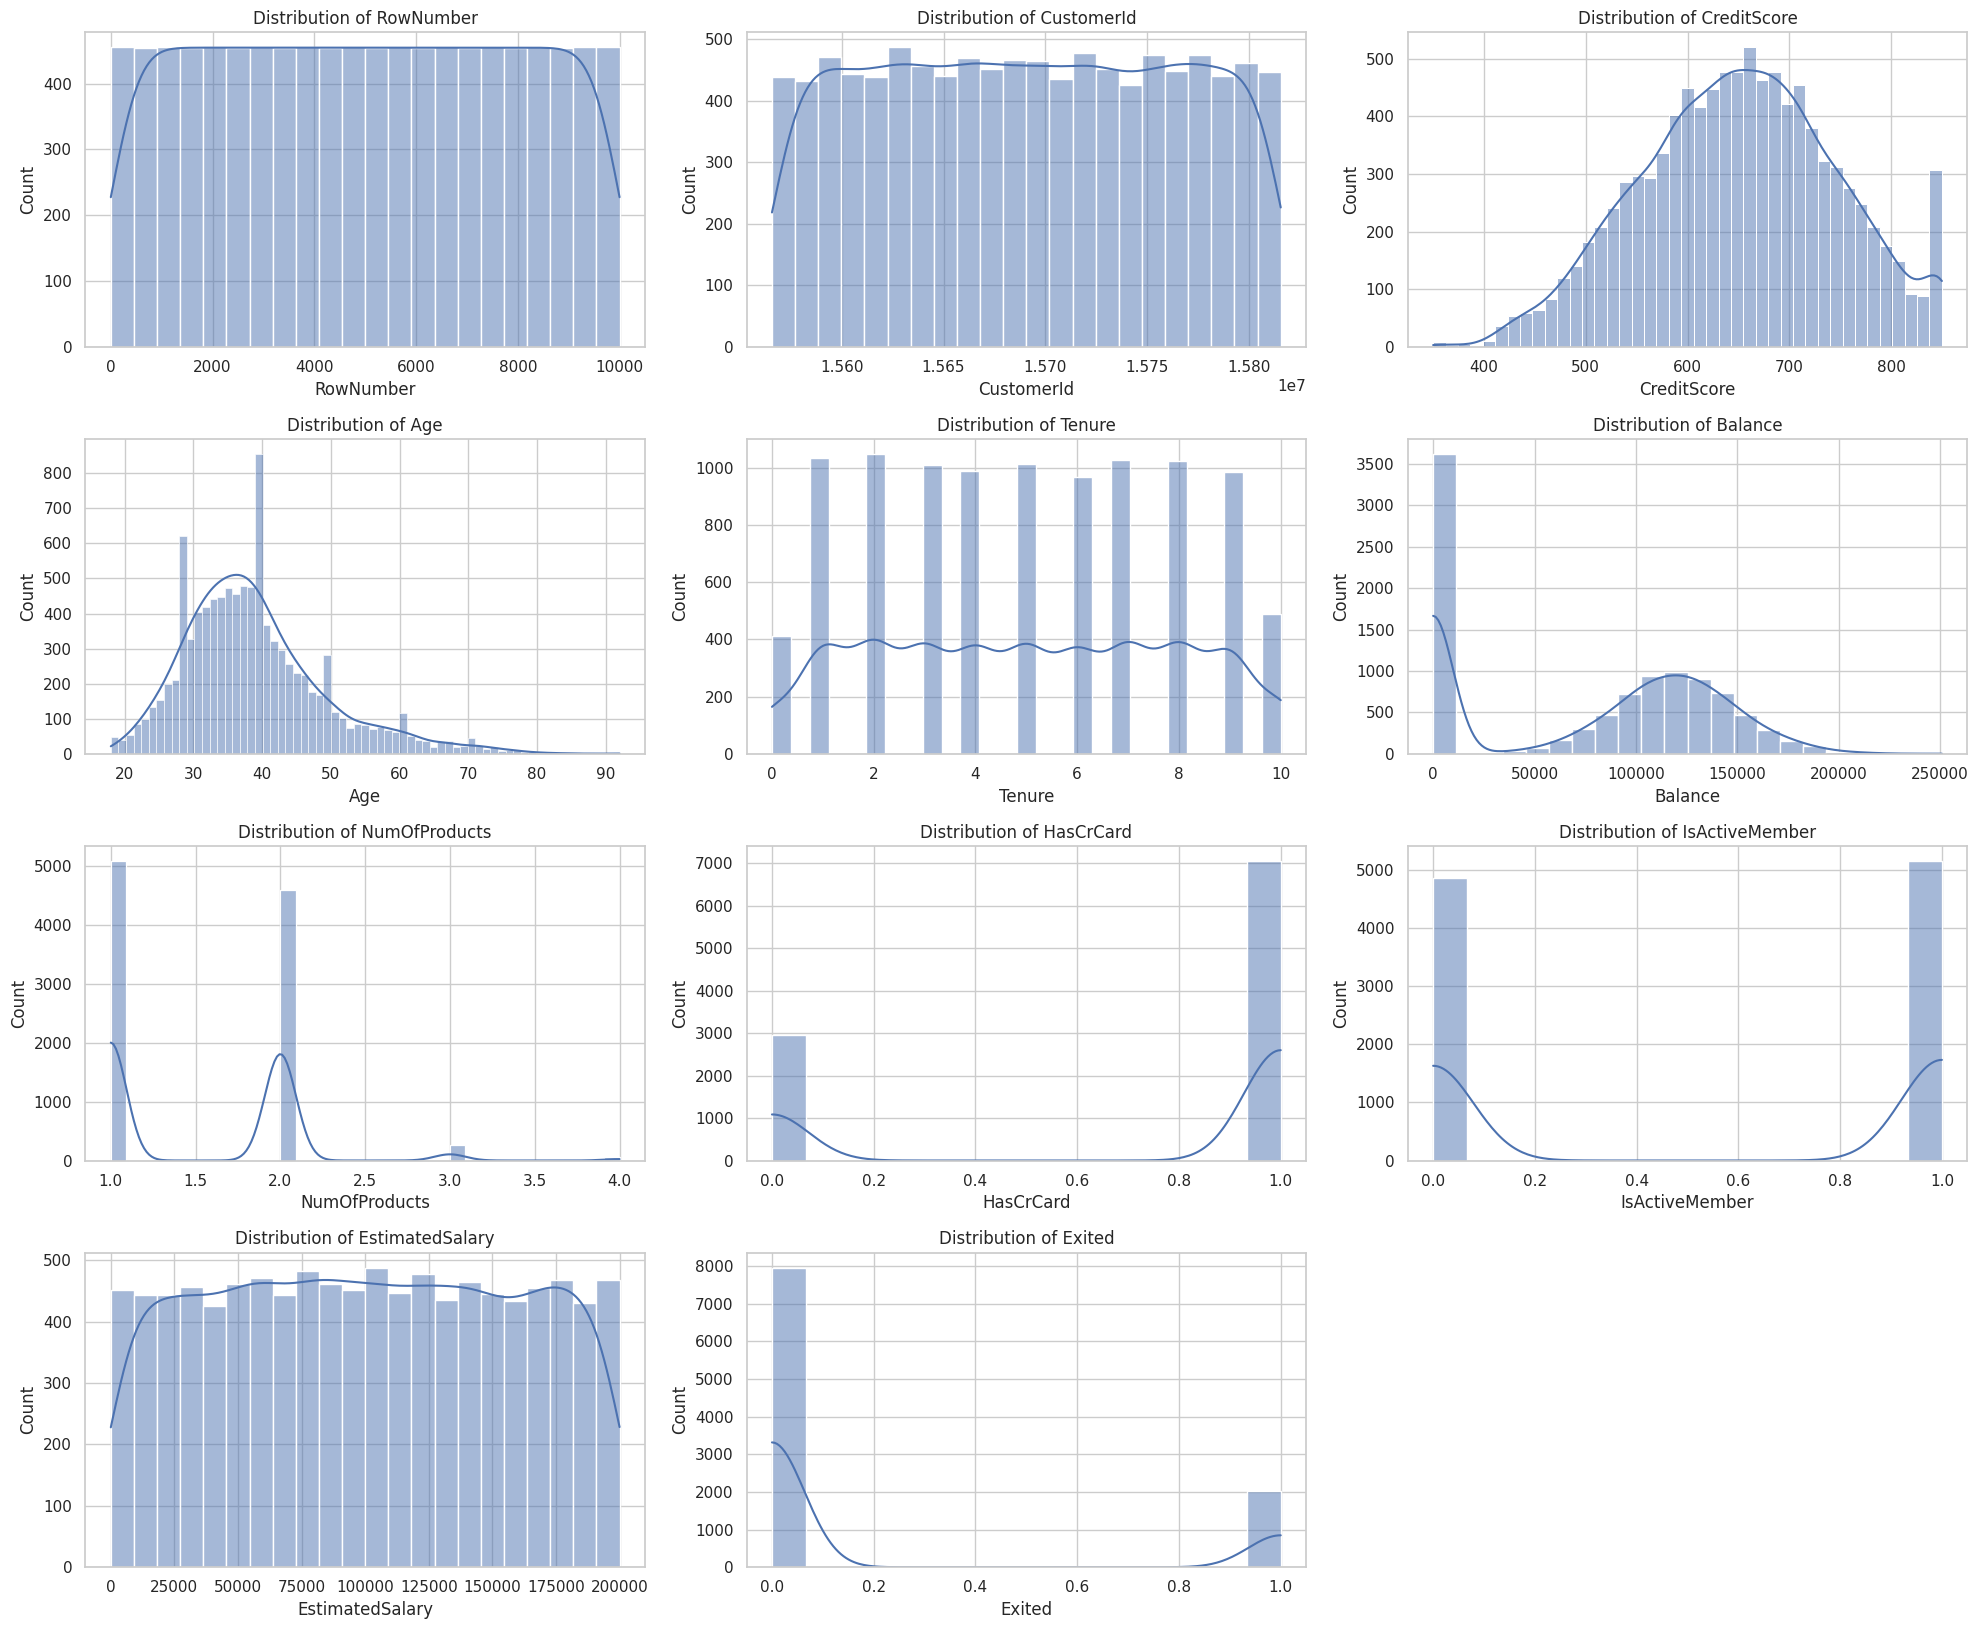

In [18]:
# Plotting distributions of numerical features
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 20))
for idx, col in enumerate(num_cols):
    plt.subplot(5, 3, idx + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


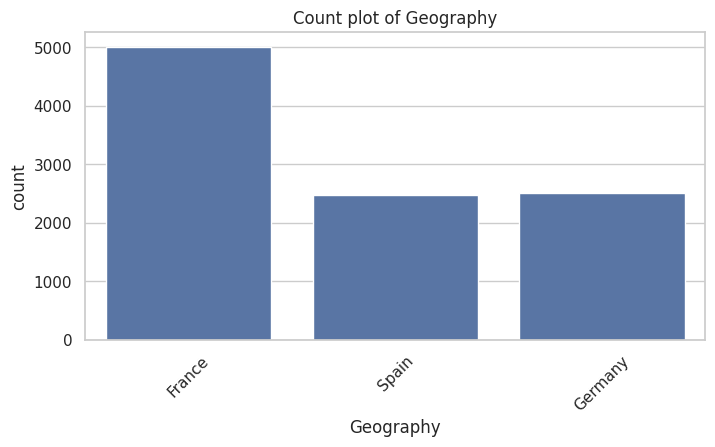

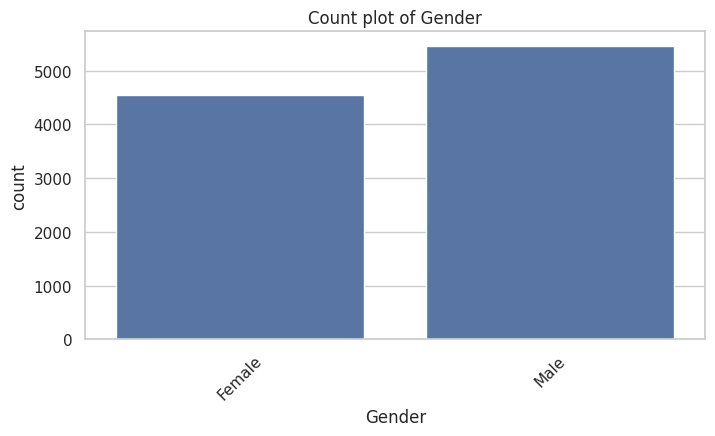

In [19]:
# Categorical feature distributions
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    if col != "Surname":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df)
        plt.title(f'Count plot of {col}')
        plt.xticks(rotation=45)
        plt.show()

In [23]:
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df=df.drop("Surname",axis=1)

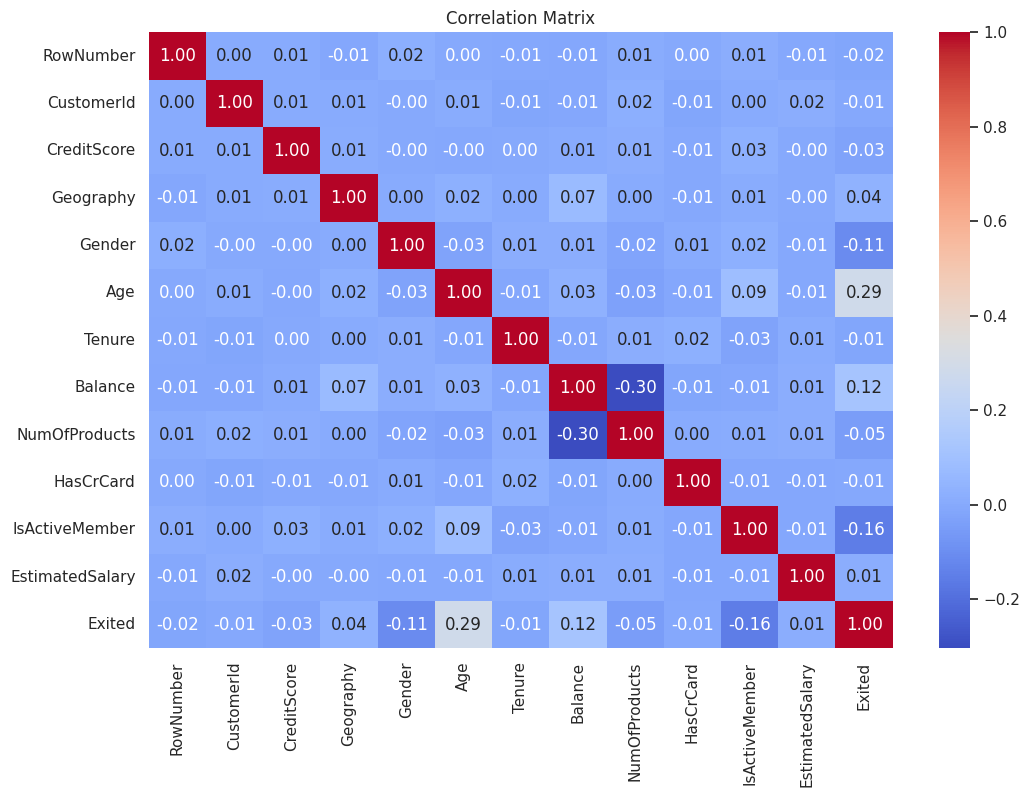

In [27]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


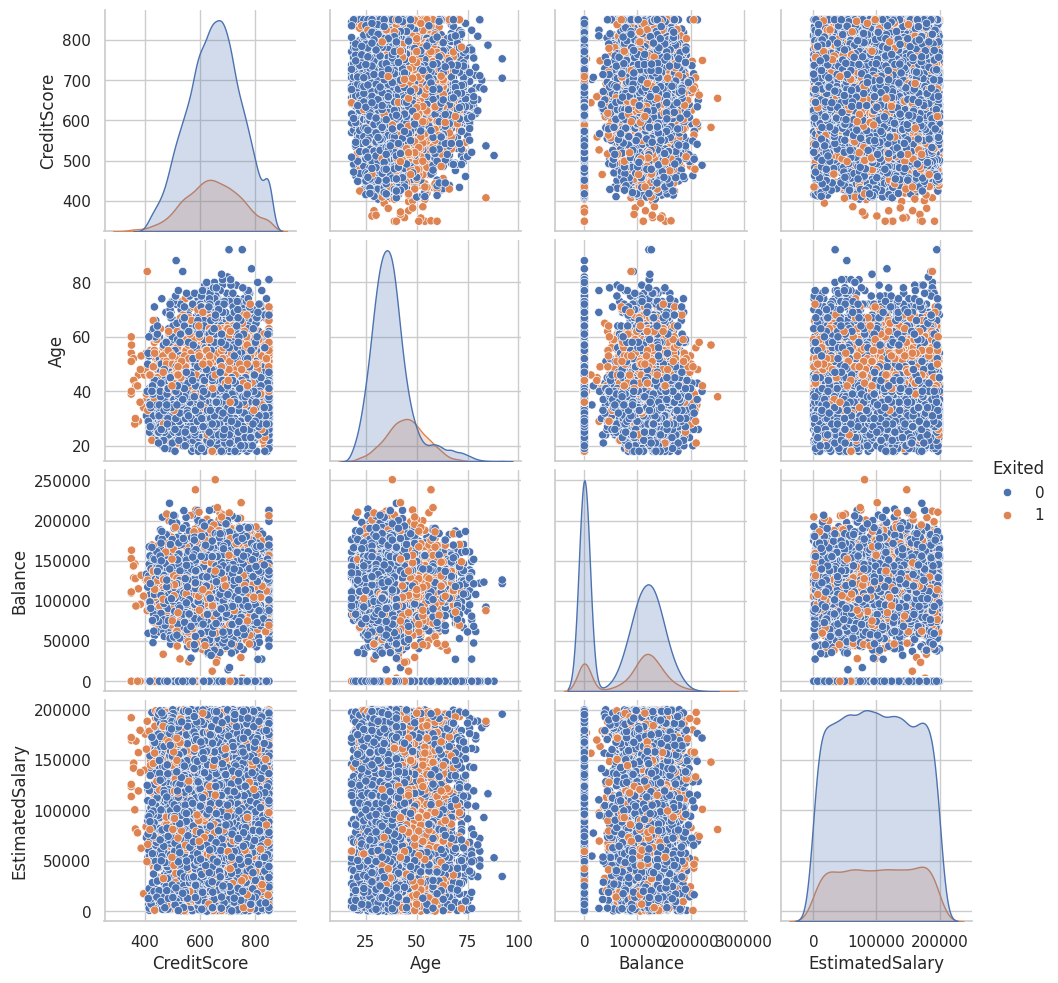

In [28]:
# Pairplots for selected features
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']

sns.pairplot(df[selected_features], hue='Exited')
plt.show()

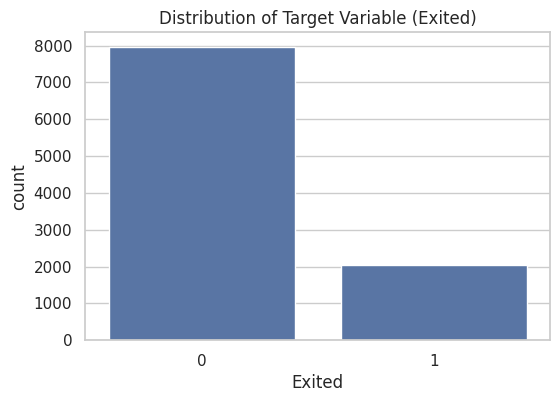


Churn Rate:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [25]:
# 'Exited' is usually the churn indicator
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

# Churn percentage
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(f"\nChurn Rate:\n{churn_rate}")


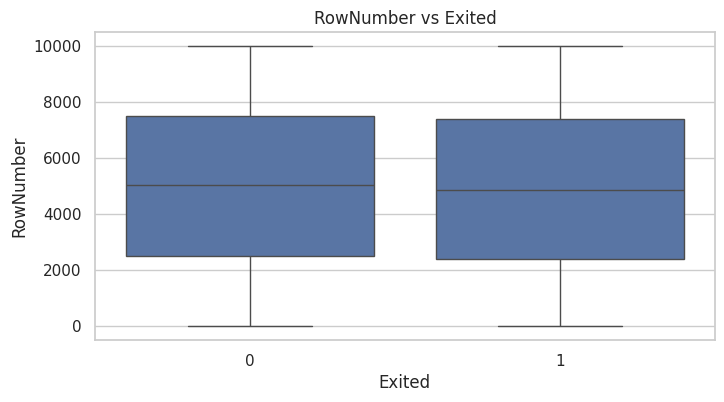

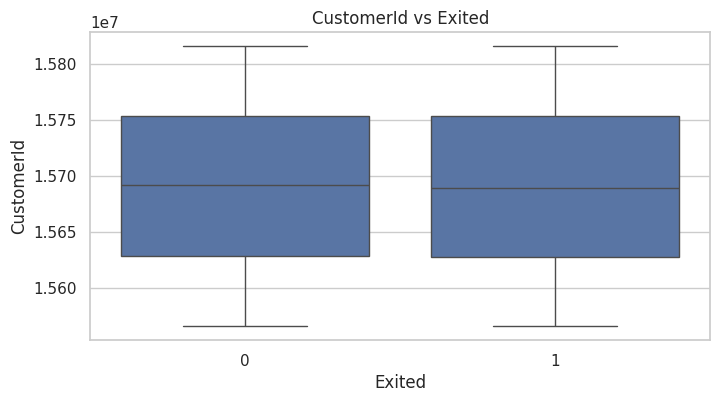

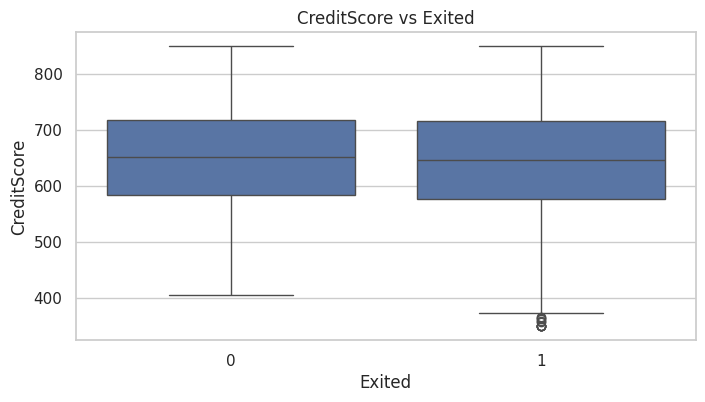

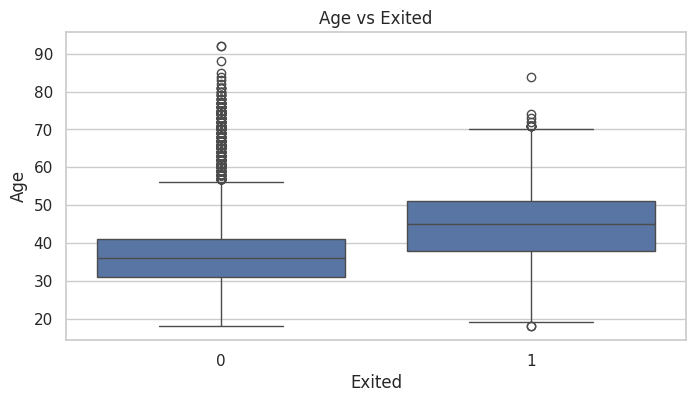

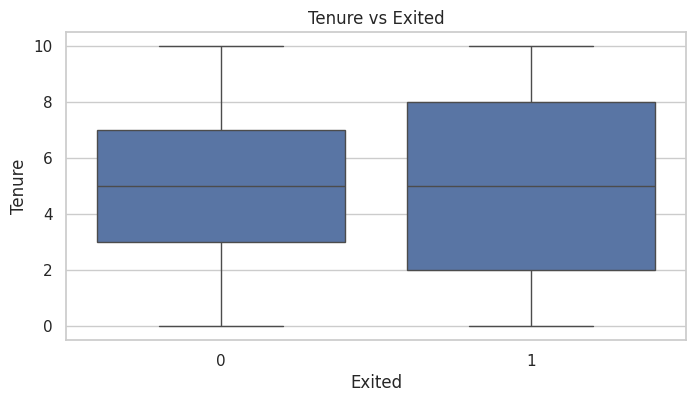

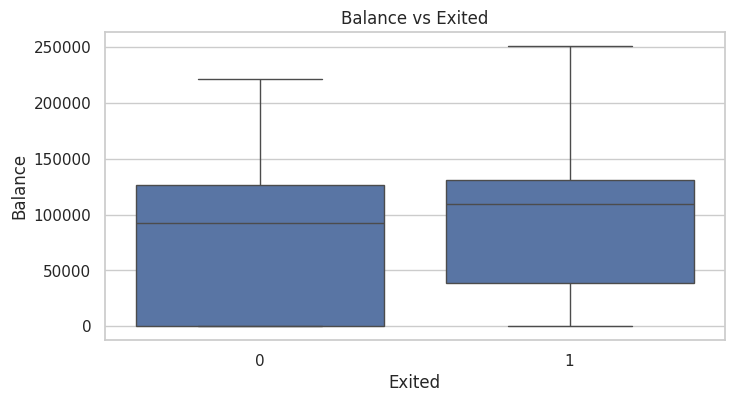

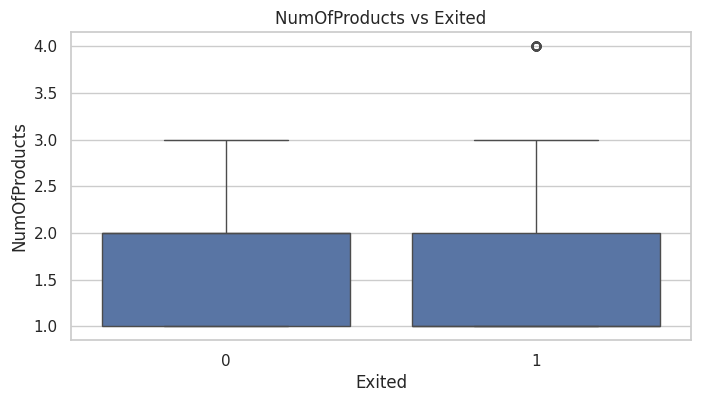

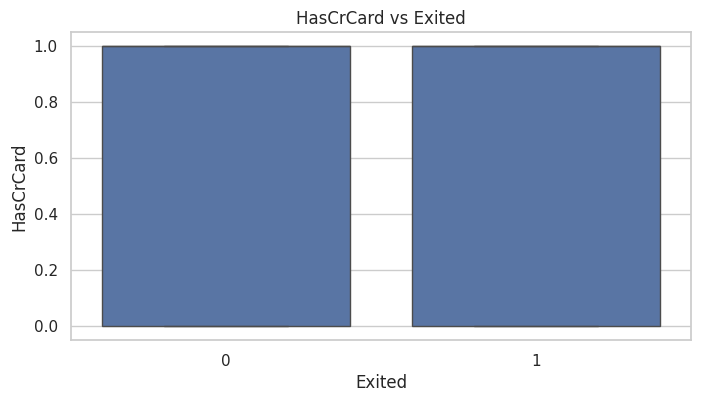

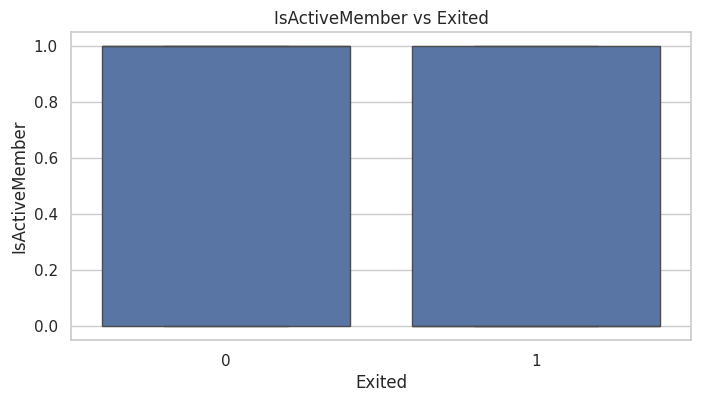

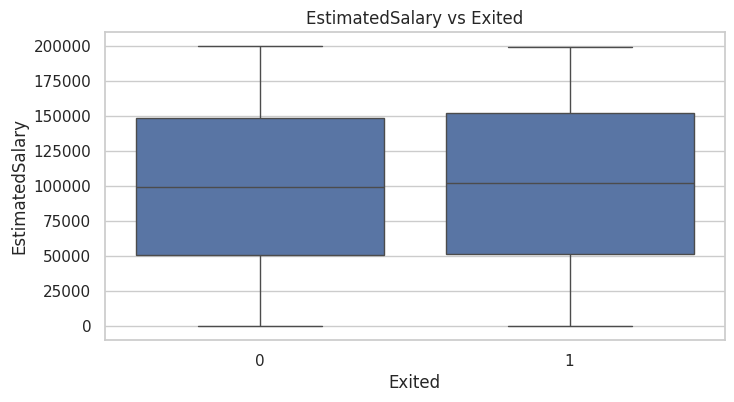

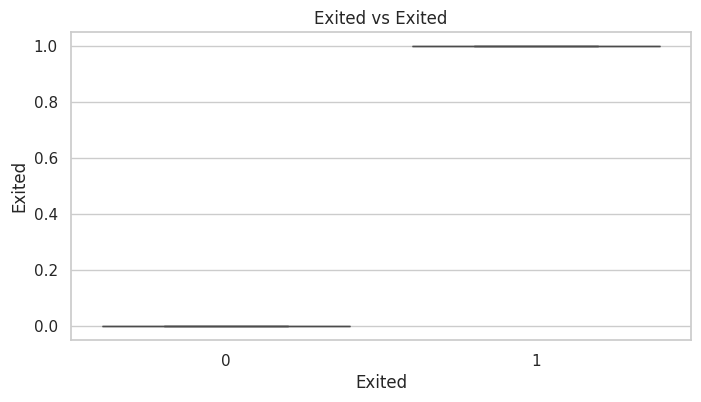

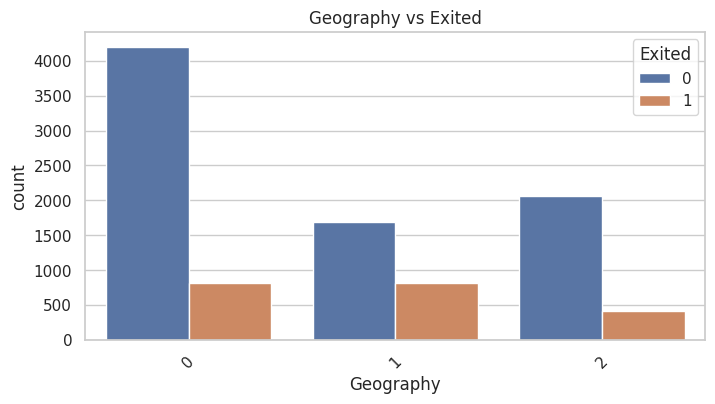

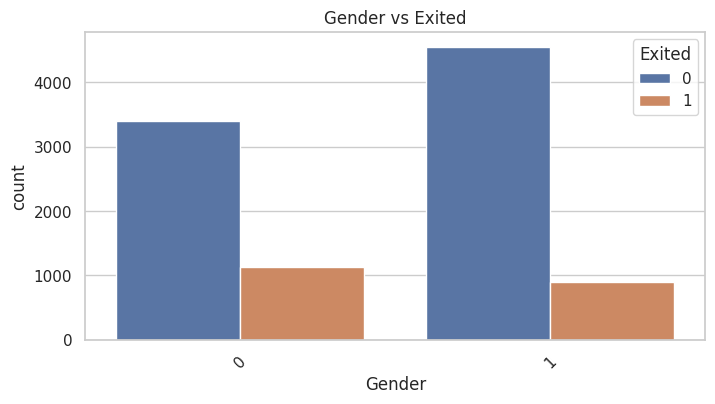

In [29]:
# Numerical features vs Target
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.show()

# Categorical features vs Target
for col in cat_cols:
    if col != "Surname":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue='Exited', data=df)
        plt.title(f'{col} vs Exited')
        plt.xticks(rotation=45)
        plt.show()
